In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
# 1. Loading data
dataset = pd.read_csv('Titanic-Dataset.csv')
dataset.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 2. Data preparation 
# a. Handle missing values 
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)  
dataset['Cabin'].fillna(dataset['Cabin'].mode()[0], inplace=True) 
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True) 

In [8]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# b. Converting categorical data 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Sex']=encoder.fit_transform(dataset['Sex'])

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Ticket']=encoder.fit_transform(dataset['Ticket'])

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Cabin']=encoder.fit_transform(dataset['Cabin'])

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Embarked']=encoder.fit_transform(dataset['Embarked'])

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 69.7+ KB


In [14]:
# c . deal with outliers
from scipy.stats import zscore

numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

In [15]:
# d. Feature and target selection
dataset.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
# 1st method
X = dataset[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = dataset['Survived']

In [17]:
# 2nd method
#X = dataset.iloc[ : , [0, 2, 4, 5, 6, 7, 8, 9, 10, 11]]
#y = dataset.iloc[ : , 1]

In [18]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,0,38.0,1,0,596,71.2833,81,0
2,3,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,0,35.0,1,0,49,53.1000,55,2
4,5,3,1,35.0,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,101,13.0000,47,2
887,888,1,0,19.0,0,0,14,30.0000,30,2
888,889,3,0,28.0,1,2,675,23.4500,47,2
889,890,1,1,26.0,0,0,8,30.0000,60,0


In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
# 3. Séparation des données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,1,45.5,0,0,20,28.5000,56,2
733,734,2,1,23.0,0,0,228,13.0000,47,2
382,383,3,1,32.0,0,0,665,7.9250,47,2
704,705,3,1,26.0,1,0,398,7.8542,47,2
813,814,3,0,6.0,0,2,333,31.2750,47,2
...,...,...,...,...,...,...,...,...,...,...
106,107,3,0,21.0,0,0,296,7.6500,47,2
270,271,1,1,28.0,0,0,47,31.0000,47,2
860,861,3,1,41.0,2,0,399,14.1083,47,2
435,436,1,0,14.0,1,2,33,120.0000,47,2


In [22]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,3,1,28.0,1,1,189,15.2458,47,0
439,440,2,1,31.0,0,0,547,10.5000,47,2
840,841,3,1,20.0,0,0,647,7.9250,47,2
720,721,2,0,6.0,0,1,155,33.0000,47,2
39,40,3,0,14.0,1,0,186,11.2417,47,0
...,...,...,...,...,...,...,...,...,...,...
433,434,3,1,17.0,0,0,657,7.1250,47,2
773,774,3,1,28.0,0,0,201,7.2250,47,0
25,26,3,0,38.0,1,0,329,31.3875,47,2
84,85,2,0,17.0,0,0,637,10.5000,47,2


In [23]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [24]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [25]:
# 4. standardization of characteristics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [26]:
# 5. Creating the model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state=42, max_iter=200)  
# Model training  
regressor.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [27]:
# 6. Assessment
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  
y_pred = regressor.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred))  
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



In [28]:
labels = y_test
guesses = y_pred

print('accuracy_score ' , accuracy_score(labels, guesses))
print('recall_score ' , recall_score(labels, guesses))
print('precision_score ' , precision_score(labels, guesses))
print('f1_score ' , f1_score(labels, guesses))

accuracy_score  0.8100558659217877
recall_score  0.7837837837837838
precision_score  0.7631578947368421
f1_score  0.7733333333333334


In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)
accuracy_score(y_test, y_pred)

[[87 18]
 [16 58]]


0.8100558659217877

In [30]:
# specificity
specificity = recall_score(y_test, y_pred, pos_label = 0)
print('specificity or True Negative : ' , specificity)

specificity or True Negative :  0.8285714285714286


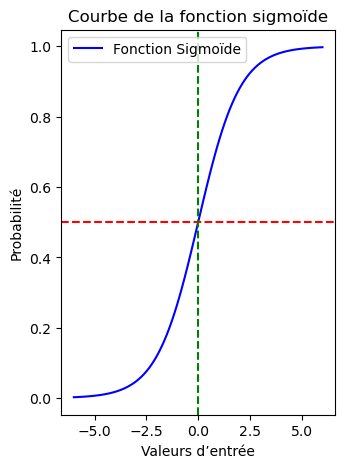

In [32]:
# 7. Visualization
# a. Visualization of the sigmoid function 
x_values = np.linspace(-6, 6, 100)  
sigmoid = 1 / (1 + np.exp(-x_values))  

plt.figure(figsize=(12, 5))  
plt.subplot(1, 3, 1)  
plt.plot(x_values, sigmoid, label='Fonction Sigmoïde', color='blue')  
plt.title('Courbe de la fonction sigmoïde')  
plt.xlabel('Valeurs d’entrée')  
plt.ylabel('Probabilité')  
plt.axhline(0.5, color='red', linestyle='--')  
plt.axvline(0, color='green', linestyle='--')  
plt.legend()  

Text(0.5, 0, 'Prédictions')

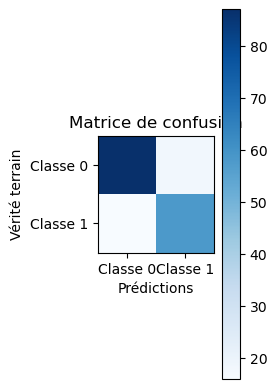

In [33]:
# b. Visualization of the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)  
plt.subplot(1, 3, 2)  
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  
plt.title('Matrice de confusion')  
plt.colorbar()  
tick_marks = np.arange(2)  
plt.xticks(tick_marks, ['Classe 0', 'Classe 1'])  
plt.yticks(tick_marks, ['Classe 0', 'Classe 1'])  
plt.ylabel('Vérité terrain')  
plt.xlabel('Prédictions') 

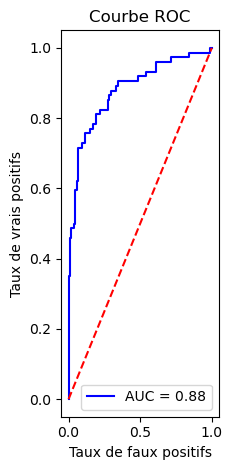

In [37]:
# c. ROC curve 
y_prob = regressor.predict_proba(X_test_scaled)[:, 1]
from sklearn.metrics import confusion_matrix, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  
roc_auc = auc(fpr, tpr)  

plt.subplot(1, 3, 3)  
plt.plot(fpr, tpr, color='blue', label='AUC = {:.2f}'.format(roc_auc))  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.title('Courbe ROC')  
plt.xlabel('Taux de faux positifs')  
plt.ylabel('Taux de vrais positifs')  
plt.legend()  

plt.tight_layout()  
plt.show() 